For each question, enter your answer as Markdown-formatted text and/or Python code in the cells provided. 

# Audible Fourier Transforms

<span style="color:red">**Question 1**. When you first load the **Frequency and Phase** app, both signals are assigned the same frequency and a relative phase of zero. Since the signals are the same, the Fourier Transforms are also identical. How do the two FFTs begin to differ when (a) The frequency of one of the components changes, or (b) a relative phase is introduced?</span>

<span style="color:red">**Question 2**. Again in the **Frequency and Phase** app, what does the signal *sound like* when the two frequencies are only *slightly different* from each other (e.g., 110 Hz and 107 Hz)? How is this reflected in the combined signal? How is it reflected in the FFT? </span>

<span style="color:red">**Question 3**.  In the **Gaussian Pulses** app, how does the width of the FFT curve change when you increase or decrease the pulse duration $\tau$? </span>

<span style="color:red">**Question 4**.  In the **Chirped Pulses** app, how does non-zero chirp alter the shape of the FFT? Why do you think this is? Can you hear this effect audibly? </span>

# Fourier Transforms in MD Analysis


As we'll see later in the course, spectroscopic signals usually result from the a charged (or more often polarized) material system oscillating at a characteristic frequency. Very often the frequency-domain signal that we record experimentally is in fact just the *Fourier transform* of the time trace of some collective variable such as the dipole moment ($\mu(t)$) or the average position $\langle x(t)\rangle$ of a group of particles. 

To give you some sense for how this works, the code below runs an MD simulation for an ideal gas of 5000 particles, and records the average particle position as a function of time. The backbone for this code is just the solution to Exercise 1, with only a couple of additions:
* Instead of the position of the first particle, we track the average position of *all* particles (calculated using `np.mean()`) in the NumPy vector``xavg``. (``xavg[n]`` is the average position of the particles at the $n^\text{th}$ time step.)
* The red vertical line shows the *average* x-position of all particles at the given time step. 
* The x-coordinates and vx-velocities are assigned so that (a) the particles start in a narrow slab on the left side of the box, and (b) all particles are initially moving to the right with the same velocity. (This asymmetry is what gives us non-vanishing entries in `xavg`.) 

Run and explore the code; then copy and paste it into the code boxes below and modify it to answer each of the questions. 

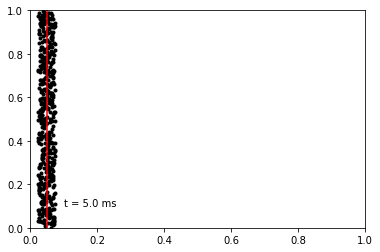

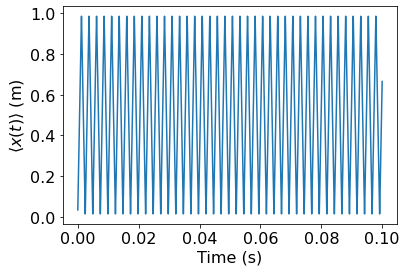

In [114]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display


Npart = 5000   # Number of particles
tmax=0.1      # Total simulation time in seconds
tvis=0.005     # Visualization time (after this, no more movie!)
dt=0.00001    # Time-step in seconds
M=4            # Mass in AMU (1 AMU = 1.66054e-27 kg)
L=1.0          # Box length in meters
V = 800          # Velocity (magnitude) in m/s

print("\n\nSuccessfully defined simulation parameters.")

# Particles start in a thin slab on the left slide of the box. 
x = L*np.random.random((Npart,))*0.05
y = L*np.random.random((Npart,))

# Particles all begin traveling to the RIGHT
vx = np.ones((Npart,))*V
vy = np.random.normal(size=(Npart,))*V      # initial y-component of velocity (arbitrary units)

print("Successfully initialized particle velocity and position")

# Initialize the figure.
# we'll plot only the first 500 particles to keep things clean.
Nplot = 500
graph_handle, = plt.plot(x[0:Nplot], y[0:Nplot], 'k.')
line_handle, = plt.plot(np.mean(x)*np.array([1,1]), [0, L], 'r')
text_handle = plt.text(0.1*L,0.1*L,'t = '+'{:.1f}'.format(0*dt*1000)+' ms')
plt.xlim([0,L])
plt.ylim([0,L])

Nsteps=int(round(tmax/dt))
xavg = np.zeros((Nsteps,))
for n in range(0,Nsteps):
    x = x + dt*vx
    y = y + dt*vy
    
    xavg[n] = np.mean(x)
    
    # Use for loop: 
    for m in range(0, Npart):
        if(x[m]>L or x[m]<0):
            vx[m]=-vx[m]
            x[m] += 2.0*dt*vx[m]
            
        if(y[m]>L or y[m]<0):
            vy[m]=-vy[m]
            y[m] += 2.0*dt*vy[m]
            
    if dt*n<tvis and (n%2)==0:
        line_handle.set_xdata(xavg[n]*np.array([1,1]))
        graph_handle.set_xdata(x[0:Nplot])
        graph_handle.set_ydata(y[0:Nplot])
        text_handle.set_text('t = '+'{:.1f}'.format(n*dt*1000)+' ms')
        display.display(plt.gcf())
        display.clear_output(wait=True)
    

plt.figure()
taxis = np.arange(0, Nsteps)*dt
plt.plot(taxis, xavg)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('$\\langle x(t) \\rangle$ (m)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<span style="color:red">**Question 5**. Calculate the Fourier transform of the `xavg` trajectory, construct an appropriate frequency axis (units of Hz), and plot the resulting absolute-value "spectrum". (Make sure to label both axes with the correct units!) Use the `plt.xlim()` command to restrict the range of frequencies viewed to (roughly) the range where the FFT has peaks on the **positive** frequency side of zero. Where does this spectrum have peaks? Why? Note that the largest non-zero peak frequency is the ratio of two simulation parameters. Which ones? </span>

In [123]:
# Enter FFT code for Question 5 here #

<span style="color:red">**Question 6**. Now plot the spectrum again, but this time subtract off the average value of `xavg` across the entire trajectory (`np.mean(xavg)`) **before** you calculate the Fourier transform. One peak in your spectrum should go away. Why? </span>

In [95]:
# Enter FFT code for Question 6 here #

<span style="color:red">**Question 7**. Now copy and paste the code from above into the cell below, and modify the simulation to add a **random** component to the x-velocities; generate the random component from a Gaussian (normal) distribution with a standard deviation of `0.1*V`, where `V` is the original uniform x-velocity of the particles. (NB: The velocities should still be *on average* moving to the right with velocity `V`; only now some are moving slightly faster and some moving slightly slower.)</span>

In [112]:
# Enter particle simulation code for Question 7 here #

<span style="color:red">. Now plot the spectrum (as in the last question). How did the randomization of the velocities change the spectrum? Why? Which simulation parameter controls the **width** of the peaks?</span>

In [111]:
# Put your FFT code for Question 7 here #

<span style="color:red">**Question 8**. Finally, in the code box below, run a simulation where the particle x-velocities are chosen from a normal distribution with mean 0 and standard deviation of `V`. (This simulates a cylinder of gas where the particles are suddenly released from one side of the box.) </span>

In [110]:
# Put your particle simulation code for Question 8 here #

<span style="color:red">Now Fourier transform the trajectory and plot the spectrum. How did the spectrum change? Why? </span>

In [109]:
# Put your FFT code for Question 8 here #